# House price prediction project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv(r"C:\Users\priya\Downloads\house_price_prediction\archive\data.csv")

train, test = train_test_split(df, test_size=0.3, random_state=30)

train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (3220, 18)
test shape: (1380, 18)


In [6]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [7]:
train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3407,2014-06-26 00:00:00,235867.0,4.0,2.0,1330,5926,1.0,0,0,4,1330,0,1942,1982,2109 NE 8th St,Renton,WA 98056,USA
3897,2014-07-03 00:00:00,342000.0,4.0,2.5,2300,6448,2.0,0,0,3,2300,0,2001,0,24612 102nd Pl SE,Kent,WA 98030,USA
3801,2014-07-01 00:00:00,399895.0,4.0,2.5,2701,4500,2.0,0,0,3,2701,0,2014,0,5535 Elaine Ave SE,Auburn,WA 98092,USA
4208,2014-07-09 00:00:00,594950.0,4.0,2.5,2720,10006,2.0,0,0,3,2720,0,1989,0,2201 223rd Pl NE,Sammamish,WA 98074,USA
222,2014-05-06 00:00:00,500000.0,3.0,2.5,1480,1171,3.0,0,0,3,1480,0,2006,0,135 25th Ave E,Seattle,WA 98112,USA


In [8]:
test.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1901,2014-06-04 00:00:00,860000.0,3.0,3.25,4720,32467,2.0,0,2,3,3190,1530,1998,2006,10510 172nd Ct SE,Renton,WA 98059,USA
2001,2014-06-05 00:00:00,605004.0,4.0,2.00,1370,4000,2.0,0,0,3,1370,0,1951,1994,2825 W Jameson St,Seattle,WA 98199,USA
326,2014-05-08 00:00:00,134000.0,2.0,1.50,980,5000,2.0,0,0,3,980,0,1922,2003,235 Thelma St,Skykomish,WA 98288,USA
1921,2014-06-04 00:00:00,285000.0,3.0,2.50,2437,5136,2.0,0,0,3,2437,0,2011,0,157 Pike St NE,Auburn,WA 98002,USA
254,2014-05-07 00:00:00,535000.0,3.0,1.75,2720,149410,1.5,0,0,3,2720,0,1988,2000,33331 NE Lake Joy Rd,Carnation,WA 98014,USA


In [9]:
df=pd.concat([train,test])
print("shape:",df.shape)

shape: (4600, 18)


In [10]:
df.head(6)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3407,2014-06-26 00:00:00,235867.0,4.0,2.0,1330,5926,1.0,0,0,4,1330,0,1942,1982,2109 NE 8th St,Renton,WA 98056,USA
3897,2014-07-03 00:00:00,342000.0,4.0,2.5,2300,6448,2.0,0,0,3,2300,0,2001,0,24612 102nd Pl SE,Kent,WA 98030,USA
3801,2014-07-01 00:00:00,399895.0,4.0,2.5,2701,4500,2.0,0,0,3,2701,0,2014,0,5535 Elaine Ave SE,Auburn,WA 98092,USA
4208,2014-07-09 00:00:00,594950.0,4.0,2.5,2720,10006,2.0,0,0,3,2720,0,1989,0,2201 223rd Pl NE,Sammamish,WA 98074,USA
222,2014-05-06 00:00:00,500000.0,3.0,2.5,1480,1171,3.0,0,0,3,1480,0,2006,0,135 25th Ave E,Seattle,WA 98112,USA
1138,2014-05-22 00:00:00,324000.0,3.0,2.5,1750,7208,2.0,0,0,3,1750,0,1994,0,11201 SE 190th Pl,Renton,WA 98055,USA


In [11]:


df.tail(6)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2475,2014-06-13 00:00:00,590000.0,4.0,2.50,2010,7972,2.0,0,0,4,2010,0,1989,0,3419 241st Pl SE,Issaquah,WA 98029,USA
1103,2014-05-21 00:00:00,712000.0,4.0,2.50,3400,247421,2.0,0,0,3,3400,0,2001,0,27728 SE 268th St,Ravensdale,WA 98051,USA
3734,2014-07-01 00:00:00,345000.0,2.0,1.00,1080,7775,1.0,0,0,3,1080,0,1955,2005,6439 Marshall Ave SW,Seattle,WA 98136,USA
3873,2014-07-02 00:00:00,2147500.0,3.0,3.50,4660,5500,2.0,0,4,5,3040,1620,1909,1988,2826 10th Ave E,Seattle,WA 98102,USA
810,2014-05-16 00:00:00,565000.0,3.0,2.25,1520,1221,3.0,0,0,3,1520,0,2013,1923,1512 NW 62nd St,Seattle,WA 98107,USA
1285,2014-05-23 00:00:00,498000.0,2.0,2.00,1140,8282,1.0,0,0,3,1140,0,1924,2009,2086 Market St,Kirkland,WA 98033,USA


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 3407 to 1285
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float64

In [17]:
int_features=df.select_dtypes(include=["int64"]).columns
print("Total integer features:",int_features.shape[0])
float_features=df.select_dtypes(include=["float64"]).columns
print("Total float features:",float_features.shape[0])                                        


Total integer features: 9
Total float features: 4


In [24]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [26]:
df.describe().shape

(8, 13)

In [28]:
df["bathrooms"].head(10)

3407    2.00
3897    2.50
3801    2.50
4208    2.50
222     2.50
1138    2.50
1519    2.50
2361    3.75
2593    1.00
658     2.50
Name: bathrooms, dtype: float64

<Axes: >

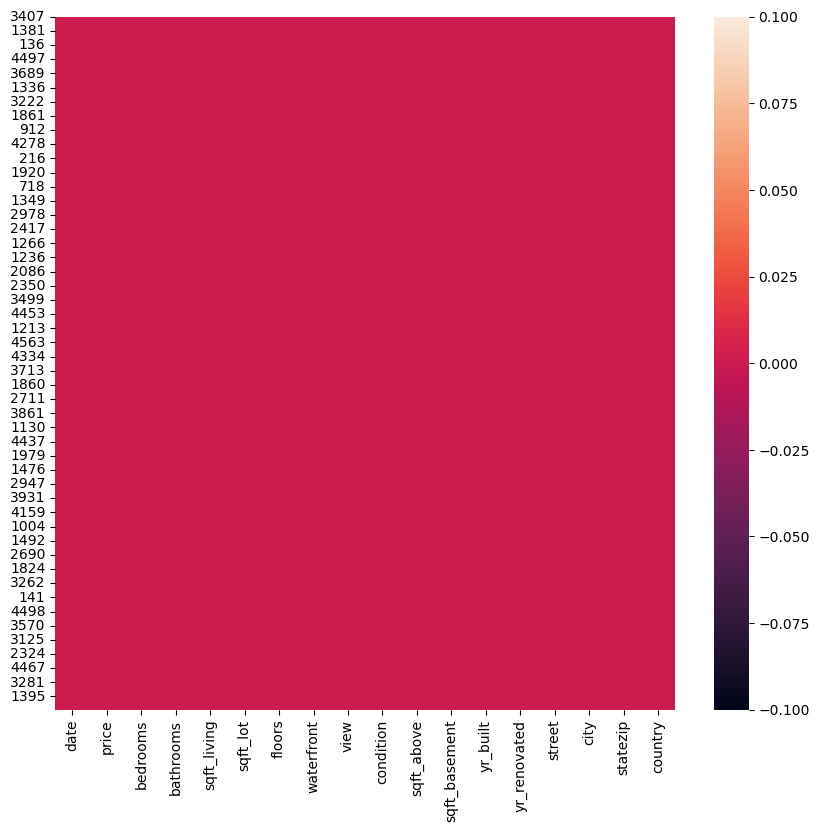

In [30]:
plt.figure(figsize=(10,9))
sns.heatmap(df.isnull())

In [31]:
df=df.set_index("date")

In [32]:
null_count=df.isnull().sum()
null_count

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [33]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
country          0.0
dtype: float64

In [38]:
miss_value_50_perc=null_percent[null_percent > 50]
miss_value_50_perc

Series([], dtype: float64)

In [40]:
df["price"].value_counts().head(10)

price
0.0         49
300000.0    42
400000.0    31
450000.0    29
600000.0    29
440000.0    29
350000.0    28
435000.0    27
550000.0    27
250000.0    27
Name: count, dtype: int64

In [42]:

missing_value_feat=null_percent[null_percent > 0]
print("Total missing value features = ",len(missing_value_feat))

Total missing value features =  0


In [44]:
df["price"].mode()[0]

0.0

In [46]:
num_rows_with_missing_values = train.isnull().any(axis=1).sum()
print(num_rows_with_missing_values) 

0


In [48]:
for_num_conv = ["price", "bedrooms", "bathrooms", "view"]

for feat in for_num_conv:
    print(f"{feat} : datatype = {train[feat].dtype}")

price : datatype = float64
bedrooms : datatype = float64
bathrooms : datatype = float64
view : datatype = int64


In [50]:
train[for_num_conv].head()

,price,bedrooms,bathrooms,view
3407,235867.0,4.0,2.0,0
3897,342000.0,4.0,2.5,0
3801,399895.0,4.0,2.5,0
4208,594950.0,4.0,2.5,0
222,500000.0,3.0,2.5,0


In [52]:
train["view"].unique()

array([0, 2, 3, 1, 4], dtype=int64)

In [54]:
calendar.month_abbr[10]

'Oct'

In [56]:
train["view"]=train["view"].apply(lambda x : calendar.month_abbr[x])
train["view"].unique()

array(['', 'Feb', 'Mar', 'Jan', 'Apr'], dtype=object)

In [58]:
for feat in for_num_conv:
    train[feat]=train[feat].astype(str)

In [60]:
for_num_conv = ["price", "bedrooms", "bathrooms", "view"]

for feat in for_num_conv:
    print(f"{feat} : datatype = {train[feat].dtype}")

price : datatype = object
bedrooms : datatype = object
bathrooms : datatype = object
view : datatype = object


In [62]:

df_encod=train.copy()
obj_features=df_encod.select_dtypes(include="object").columns.tolist()
print("total features: ",len(obj_features))
print("Features:",obj_features)

total features:  9
Features: ['date', 'price', 'bedrooms', 'bathrooms', 'view', 'street', 'city', 'statezip', 'country']


In [64]:
df_encod[obj_features].head(3)

,date,price,bedrooms,bathrooms,view,street,city,statezip,country
3407,2014-06-26 00:00:00,235867.0,4.0,2.0,,2109 NE 8th St,Renton,WA 98056,USA
3897,2014-07-03 00:00:00,342000.0,4.0,2.5,,24612 102nd Pl SE,Kent,WA 98030,USA
3801,2014-07-01 00:00:00,399895.0,4.0,2.5,,5535 Elaine Ave SE,Auburn,WA 98092,USA


In [66]:
df_encod=pd.get_dummies(df_encod, columns=obj_features, prefix=obj_features, drop_first=True)

In [68]:
df_encod["floors"].value_counts()

floors
1.0    1522
2.0    1279
1.5     296
3.0      98
2.5      24
3.5       1
Name: count, dtype: int64

In [70]:
pd.get_dummies(df_encod["floors"], columns="floors", prefix="floors", drop_first=False)

,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
3407,True,False,False,False,False,False
3897,False,False,True,False,False,False
3801,False,False,True,False,False,False
4208,False,False,True,False,False,False
222,False,False,False,False,True,False
1138,False,False,True,False,False,False
1519,False,False,True,False,False,False
2361,False,False,True,False,False,False
2593,True,False,False,False,False,False
658,True,False,False,False,False,False


In [71]:
categorical_columns = df_encod.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical columns
df_encod = pd.get_dummies(df_encod, columns=categorical_columns, drop_first=True)

print(df_encod.shape)

(3220, 4812)


In [74]:
df_encod.shape

(3220, 4812)

In [75]:
len_train= train.shape[0]
len_train

3220

In [78]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1) 
y = df['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [80]:
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (3220, 16), X_test: (1380, 16)
y_train: (3220,), y_test: (1380,)


In [82]:
print(X_train.head())  
print(X_train.columns) 




                     bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
date                                                                      
2014-06-13 00:00:00       3.0       2.25         1400      3814     2.0   
2014-05-14 00:00:00       2.0       1.00          830      4000     1.0   
2014-07-09 00:00:00       3.0       2.50         1610      7223     2.0   
2014-05-18 00:00:00       3.0       2.00         1940     55756     1.0   
2014-05-16 00:00:00       3.0       1.75         1560      4049     1.5   

                     waterfront  view  condition  sqft_above  sqft_basement  \
date                                                                          
2014-06-13 00:00:00           0     0          3        1400              0   
2014-05-14 00:00:00           0     0          3         830              0   
2014-07-09 00:00:00           0     0          3        1610              0   
2014-05-18 00:00:00           0     0          5        1940              0   


In [84]:


X_train = X_train.drop(['price'], axis=1, errors='ignore')


In [86]:

X_train = X_train.drop(['bedrooms'], axis=1)
X_test = X_test.drop(['bedrooms'], axis=1)

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = X_test.fillna(0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [87]:
X_train[:3,:]

array([[ 0.09382471, -0.76921659, -0.30143987, ..., -0.11770261,
        -0.02492998, -0.01762542],
       [-1.49961176, -1.35071027, -0.29635465, ..., -0.11770261,
        -0.02492998, -0.01762542],
       [ 0.412512  , -0.55498208, -0.2082382 , ..., -0.11770261,
        -0.02492998, -0.01762542]])

In [88]:
X_test[:3,:]

array([[-0.22486259,  0.21014118, -0.0956799 , ..., -0.11770261,
        -0.02492998, -0.01762542],
       [-1.49961176, -0.39175578, -0.25474335, ..., -0.11770261,
        -0.02492998, -0.01762542],
       [ 0.412512  ,  0.14893132, -0.23735518, ..., -0.11770261,
        -0.02492998, -0.01762542]])

In [92]:
sc.mean_

array([2.17639752e+00, 2.15401242e+03, 1.48396457e+04, ...,
       1.36645963e-02, 6.21118012e-04, 3.10559006e-04])

In [94]:
sc.n_features_in_

3306

In [96]:
sc.n_samples_seen_

3220

In [98]:
sc.scale_

array([7.84468054e-01, 9.80234218e+02, 3.65766007e+04, ...,
       1.16094251e-01, 2.49144983e-02, 1.76199478e-02])

In [100]:
sc.with_mean

True

In [102]:
sc.with_std

True

In [104]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.isotonic import IsotonicRegression

In [106]:
svr=SVR()
lr=LinearRegression()
sgdr=SGDRegressor()
knr=KNeighborsRegressor()
gpr= GaussianProcessRegressor()
dtr= DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr= RandomForestRegressor()
xgbr= XGBRegressor()
mlpr=MLPRegressor()
ir=IsotonicRegression()

In [108]:
models = {
    "SVR": SVR(),
    "LinearRegression": LinearRegression(),
    "SGDRegressor": SGDRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "MLPRegressor": MLPRegressor(),
    "IsotonicRegression": IsotonicRegression()
}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Evaluate each model using cross-validation
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    
    try:
        # Special handling for IsotonicRegression (single feature)
        if model_name == "IsotonicRegression":
            X_train_single = X_train[['feature_name']]  # Replace 'feature_name' with a valid column name
            scores = cross_val_score(model, X_train_single, y_train, cv=5, scoring='neg_mean_squared_error')
        else:
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        
        # Calculate the average MSE
        mean_mse = -scores.mean()
        rmse = mean_mse ** 0.5
        print(f"{model_name} - Mean MSE: {mean_mse:.4f}, RMSE: {rmse:.4f}")
    
    except Exception as e:
        print(f"Error with model {model_name}: {str(e)}")
